In [26]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

plt.rcParams['figure.dpi'] = 120

In [27]:
from workshop.phase1 import load_data

In [28]:
u, y = load_data()

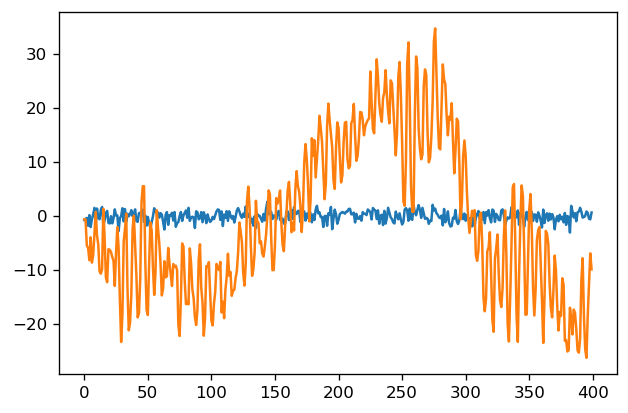

In [29]:
plt.plot(u)
plt.plot(y)
plt.show()

In [30]:
n = 200
from scipy.linalg import toeplitz

In [31]:
U = toeplitz(u, np.zeros(n))

In [32]:
g_ls = np.linalg.lstsq(U, y, rcond=None)[0]

In [33]:
from workshop.phase1 import true_system as g_0

In [34]:
def stable_spline(theta):
    row = np.arange(n)[np.newaxis]
    return theta[0] * theta[1] ** np.maximum(row, row.T)

In [35]:
K = stable_spline([10.0, 0.9])

N = len(y)
g_ker = K @ U.T @ np.linalg.solve(U @ K @ U.T + np.eye(N), y)

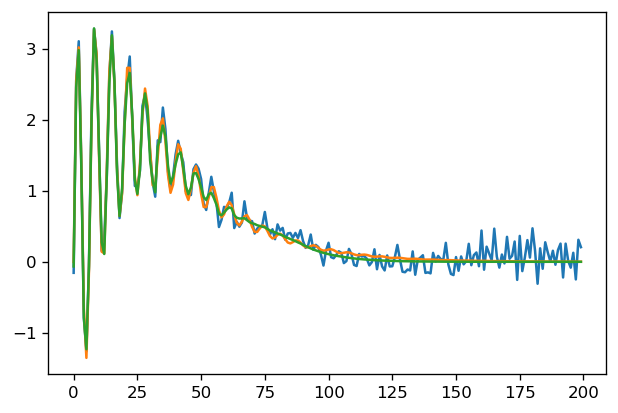

In [36]:
plt.plot(g_ls)
plt.plot(g_0)
plt.plot(g_ker)

In [37]:
from workshop.phase1 import likelihood_function

neg_marg_lik = likelihood_function(U, y)


In [38]:
from scipy.optimize import minimize
sol = minimize(neg_marg_lik, [10.0, 0.9, 1.0])

hyper = sol.x

KeyboardInterrupt: 

In [ ]:
K_opt = stable_spline(hyper[:2])
g_opt = K_opt @ U.T @ np.linalg.solve(U @ K_opt @ U.T + hypers[2]*np.eye(N), y)

In [ ]:
import sklearn.gaussian_process as gp
np.random.seed(1337)

In [39]:
from workshop.phase2 import true_function

In [40]:
N = 16
x_obs = 2*np.random.rand(N)
y_obs = true_function(x_obs)

In [44]:
K_linear = gp.kernels.DotProduct()
K_quadratic = K_linear ** 2
K_gauss = gp.kernels.RBF()
K_laplace = gp.kernels.Matern()

In [52]:
mdl = gp.GaussianProcessRegressor(kernel=K_laplace)
mdl.fit(x_obs.reshape(-1, 1), y_obs)

GaussianProcessRegressor(kernel=Matern(length_scale=1, nu=1.5))

/home/rsrsl/publications/IFAC2020/workshop/handson-session/workshop/phase2.py:5: RuntimeWarning: invalid value encountered in true_divide
  return np.sin(2 * np.pi * x) / (2 * x)


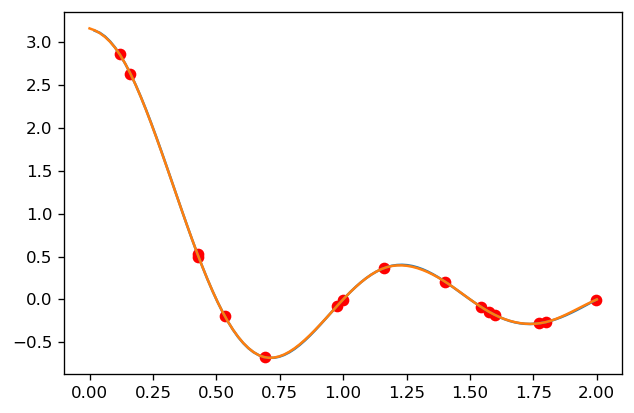

In [53]:
x = np.linspace(0, 2, 100)
plt.plot(x, true_function(x))
plt.plot(x, mdl.predict(x.reshape(-1, 1)))
plt.scatter(x_obs, y_obs, color='r')

In [57]:
mdl.kernel_
mdl.log_marginal_likelihood(mdl.kernel_.theta)

5.759214114457187

In [60]:
x_meas = x_obs
y_meas = y_obs + 0.1*np.random.randn(N)

In [68]:
ker = K_gauss + gp.kernels.WhiteKernel()
mdl = gp.GaussianProcessRegressor(kernel=ker)
mdl.fit(x_meas.reshape(-1, 1), y_meas)

GaussianProcessRegressor(kernel=RBF(length_scale=1) + WhiteKernel(noise_level=1))

/home/rsrsl/publications/IFAC2020/workshop/handson-session/workshop/phase2.py:5: RuntimeWarning: invalid value encountered in true_divide
  return np.sin(2 * np.pi * x) / (2 * x)


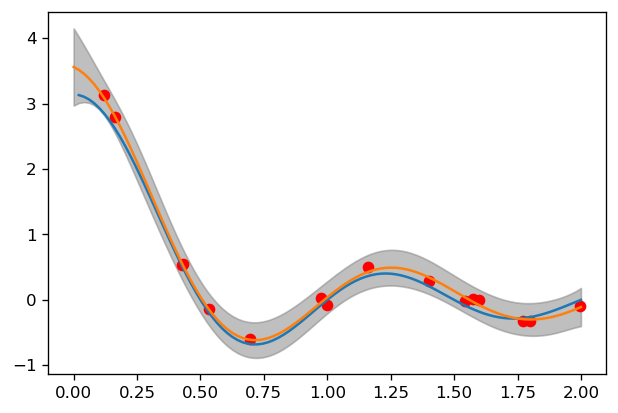

In [72]:

posterior_mean, posterior_std = mdl.predict(x.reshape(-1,1), return_std=True)

plt.plot(x, true_function(x))
plt.plot(x, posterior_mean)
plt.fill_between(x, posterior_mean - 3*posterior_std, posterior_mean + 3 *posterior_std, color="gray", alpha=0.5)

plt.scatter(x_meas, y_meas, color='r')
